In [1]:
from skimage import data, feature, transform
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from skimage.io import imread
from itertools import chain
from sklearn.datasets import fetch_lfw_people
from sklearn.feature_extraction.image import PatchExtractor
import numpy as np

In [3]:
# we can load a data-set of human faces (positive samples)
human_faces = fetch_lfw_people()
positive_images = human_faces.images[:10000]

# fetch a data-set without faces (negative samples)

non_face_topics = ['moon', 'text', 'coins']

negative_samples = [(getattr(data, name)()) for name in non_face_topics]

In [9]:
len(negative_samples)

3

In [10]:
negative_samples[0].shape , negative_samples[1].shape,negative_samples[2].shape

((512, 512), (172, 448), (303, 384))

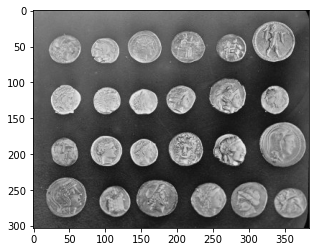

In [14]:
plt.imshow(negative_samples[2],cmap="gray")

In [83]:
positive_images.shape

(10000, 62, 47)

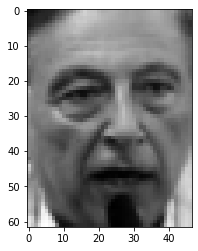

In [18]:
plt.imshow(positive_images[20],cmap="gray")

(62, 47)
(1, 62, 47)


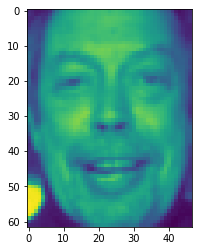

In [27]:
image_sam=positive_images[0]
print(image_sam.shape)
new_im= image_sam[np.newaxis]
print(new_im.shape)
#plt.imshow(image_sam) 
plt.imshow(new_im[0])

In [65]:
positive_images[0].shape

(62, 47)

In [72]:
img=positive_images[0]
extractor = PatchExtractor(patch_size=(16, 40), max_patches=20, random_state=14)
patches = extractor.transform((positive_images[0][np.newaxis]))
patches.shape

(20, 16, 40)

In [78]:
patches2 = extractor.transform((positive_images[1][np.newaxis]))
patches2.shape

(20, 16, 40)

In [82]:
k=np.vstack([patches,patches2])
k.shape

(40, 16, 40)

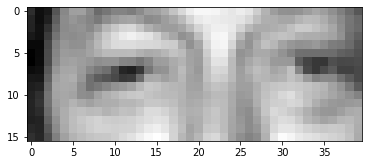

In [77]:
plt.imshow(patches[18],cmap="gray")

In [50]:
# we will use PatchExtractor to generate several variants of these images
def generate_random_samples(image, num_of_generated_images=100, patch_size=positive_images[0].shape):
    extractor = PatchExtractor(patch_size=patch_size, max_patches=num_of_generated_images, random_state=42)
    patches = extractor.transform((image[np.newaxis]))
    return patches


# we generate 3000 samples (negative samples without a human face)
negative_images = np.vstack([generate_random_samples(im, 1000) for im in negative_samples])

In [51]:
negative_images.shape

(3000, 62, 47)

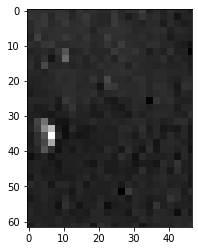

In [39]:
plt.imshow(negative_images[20],cmap="gray")

In [84]:
positive_images.shape[0]

10000

In [85]:
# a list of odd numbers
odd = [1, 3, 5, 7, 9]
 
# a list of even numbers
even = [2, 4, 6, 8, 10]
 
# chaining odd and even numbers
numbers = list(chain(odd, even))
 
print(numbers)

[1, 3, 5, 7, 9, 2, 4, 6, 8, 10]


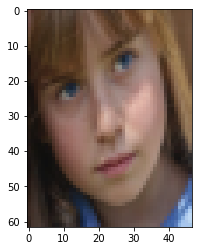

Prediction made by SVM: 1.000000


In [92]:
# we construct the training set with the output variables (labels)
# and of course we have to construct the HOG features
# TIME CONSUMING PROCEDURE !!!
X_train = np.array([feature.hog(image) for image in chain(positive_images, negative_images)])
# labels - 0 and 1 // 1: face 0: non-face
y_train = np.zeros(X_train.shape[0])
y_train[:positive_images.shape[0]] = 1

# we can construct the SVM
svm = LinearSVC()
# this is when SVM learns the parameters for the model based on the training dataset
svm.fit(X_train, y_train)

# read the test images
test_image = imread(fname='girl_face.png')
test_image = transform.resize(test_image, positive_images[0].shape)

plt.imshow(test_image, cmap='gray')
plt.show()

test_image_hog =  np.array([feature.hog(test_image)])
prediction = svm.predict(test_image_hog)
print("Prediction made by SVM: %f" % prediction)

In [91]:
np.array([feature.hog(test_image)]).shape  ##(sample_number, shape)

(1, 1215)